In [35]:
#pip install sumy
import sumy 
from sumy.summarizers.text_rank import TextRankSummarizer 
from sumy.summarizers.lsa import LsaSummarizer 
from sumy.parsers.plaintext import PlaintextParser 
from sumy.nlp.tokenizers import Tokenizer
from textwrap import wrap
from youtube_transcript_api import YouTubeTranscriptApi

In [36]:
youtube_video = "https://www.youtube.com/watch?v=FEeTLopLkEo"

In [37]:
video_id = youtube_video.split("=")[1]

In [38]:
print(video_id)

FEeTLopLkEo


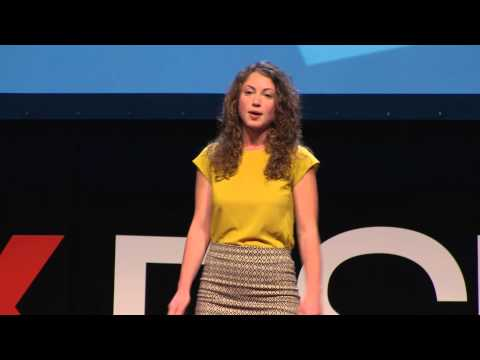

In [39]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [40]:
transcript = YouTubeTranscriptApi.get_transcript(video_id)

In [41]:
print(transcript[0:5])

[{'text': 'Transcriber: Moe Shoji\nReviewer: Ivana Korom', 'start': 0.0, 'duration': 7.0}, {'text': "I'd like you all to close your eyes.", 'start': 10.376, 'duration': 2.269}, {'text': 'Closed? Okay.', 'start': 12.645, 'duration': 2.701}, {'text': "Now, you can't see me right now,", 'start': 15.346, 'duration': 1.67}, {'text': "but I'm actually riding a unicycle,\njuggling hundreds of balls.", 'start': 17.016, 'duration': 2.582}]


In [42]:
result = ""
for i in transcript:
  result += " " + i["text"]
print(len(result))

14817


In [43]:
print(result)

 Transcriber: Moe Shoji
Reviewer: Ivana Korom I'd like you all to close your eyes. Closed? Okay. Now, you can't see me right now, but I'm actually riding a unicycle,
juggling hundreds of balls. (Laughter) No, keep your eyes closed, though. It's really great. But okay. So close your eyes,
and picture an engineer. Everyone got a picture in their head? Nod. Okay. Open your eyes. Raise your hand if you pictured a guy
sitting alone at a computer. Okay. Maybe kind of nerdy,
pocket protector. Raise your hand if you pictured
a train driver. (Laughter) That's a lot of hands. Raise your hand if you pictured a young guy in a hoodie, maybe looks a little
like Mark Zuckerberg perhaps. Raise your hand if you pictured someone
who looks like me. Okay. Not a lot of hands. Well, if you didn't raise your hand for me, I would like you to please
get up and leave. (Laughter) No, just kidding. If you didn't raise your hand for me,
it's all right. I get it all the time. Usually when I tell people
I'm an engin

In [44]:
print(result[0:500])

 Transcriber: Moe Shoji
Reviewer: Ivana Korom I'd like you all to close your eyes. Closed? Okay. Now, you can't see me right now, but I'm actually riding a unicycle,
juggling hundreds of balls. (Laughter) No, keep your eyes closed, though. It's really great. But okay. So close your eyes,
and picture an engineer. Everyone got a picture in their head? Nod. Okay. Open your eyes. Raise your hand if you pictured a guy
sitting alone at a computer. Okay. Maybe kind of nerdy,
pocket protector. Raise you


In [45]:
num_iters = int(len(result)/500)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 2000
  end = (i + 1) * 2000
 # print("input text \n" + result[start:end])
  out = result[start:end]
 
  summarized_text.append(out)

#print(summarized_text)

In [46]:
summarized = []
for i in summarized_text:
    if "\n" in i:
        i = i.split("\n")
        summarized.append(i) 

    else: 
        summarized.append(i) 

In [47]:
print(summarized)

[[' Transcriber: Moe Shoji', "Reviewer: Ivana Korom I'd like you all to close your eyes. Closed? Okay. Now, you can't see me right now, but I'm actually riding a unicycle,", "juggling hundreds of balls. (Laughter) No, keep your eyes closed, though. It's really great. But okay. So close your eyes,", 'and picture an engineer. Everyone got a picture in their head? Nod. Okay. Open your eyes. Raise your hand if you pictured a guy', 'sitting alone at a computer. Okay. Maybe kind of nerdy,', 'pocket protector. Raise your hand if you pictured', "a train driver. (Laughter) That's a lot of hands. Raise your hand if you pictured a young guy in a hoodie, maybe looks a little", 'like Mark Zuckerberg perhaps. Raise your hand if you pictured someone', "who looks like me. Okay. Not a lot of hands. Well, if you didn't raise your hand for me, I would like you to please", "get up and leave. (Laughter) No, just kidding. If you didn't raise your hand for me,", "it's all right. I get it all the time. Usuall

In [48]:
print(len(summarized))

30


In [49]:
new_result = "" 
for i in summarized:
    if len(i) > 0:
        for j in i:
            new_result += j 
            new_result += ". "
    else: 
        continue
    

In [50]:
print(new_result)

 Transcriber: Moe Shoji. Reviewer: Ivana Korom I'd like you all to close your eyes. Closed? Okay. Now, you can't see me right now, but I'm actually riding a unicycle,. juggling hundreds of balls. (Laughter) No, keep your eyes closed, though. It's really great. But okay. So close your eyes,. and picture an engineer. Everyone got a picture in their head? Nod. Okay. Open your eyes. Raise your hand if you pictured a guy. sitting alone at a computer. Okay. Maybe kind of nerdy,. pocket protector. Raise your hand if you pictured. a train driver. (Laughter) That's a lot of hands. Raise your hand if you pictured a young guy in a hoodie, maybe looks a little. like Mark Zuckerberg perhaps. Raise your hand if you pictured someone. who looks like me. Okay. Not a lot of hands. Well, if you didn't raise your hand for me, I would like you to please. get up and leave. (Laughter) No, just kidding. If you didn't raise your hand for me,. it's all right. I get it all the time. Usually when I tell people. I

In [51]:
summarizer1 = LsaSummarizer() 
parser1 = PlaintextParser.from_string(
    new_result,
    Tokenizer("english")
)
summary = summarizer1(parser1.document, sentences_count=5)

In [52]:
print(summary) 

(<Sentence: this is around the age where most girls start to lose an interest in math.>, <Sentence: (Laughter) Well, my confidence was pretty shot; and needless to say, I didn't get into the accelerator.>, <Sentence: And they whispered me a well-known industry secret: construction toys for girls don't sell.>, <Sentence: Just because this is the way things are, doesn't mean it's how they have to be.>, <Sentence: the math and science that I worked so hard to learn, but also leverages my creativity.>)


In [53]:
final_summary = ""
for i in summary:
    a = wrap(str(i))
    for i in a:
        final_summary += i + ' '
        
         


In [54]:
print(len(final_summary)) 

438


In [55]:
print(final_summary)

this is around the age where most girls start to lose an interest in math. (Laughter) Well, my confidence was pretty shot; and needless to say, I didn't get into the accelerator. And they whispered me a well-known industry secret: construction toys for girls don't sell. Just because this is the way things are, doesn't mean it's how they have to be. the math and science that I worked so hard to learn, but also leverages my creativity. 


<h3> Final Result </h3>

In [56]:
print("Input: ")
print(result)
print() 
print() 
print() 
print() 
print() 
print() 
print() 
print() 
print() 
print() 

print("=============================================================================================================")
print() 
print() 
print() 
print() 
print() 
print(" ")
print("Output Summary: ")
print(final_summary)
print() 
print() 

Input: 
 Transcriber: Moe Shoji
Reviewer: Ivana Korom I'd like you all to close your eyes. Closed? Okay. Now, you can't see me right now, but I'm actually riding a unicycle,
juggling hundreds of balls. (Laughter) No, keep your eyes closed, though. It's really great. But okay. So close your eyes,
and picture an engineer. Everyone got a picture in their head? Nod. Okay. Open your eyes. Raise your hand if you pictured a guy
sitting alone at a computer. Okay. Maybe kind of nerdy,
pocket protector. Raise your hand if you pictured
a train driver. (Laughter) That's a lot of hands. Raise your hand if you pictured a young guy in a hoodie, maybe looks a little
like Mark Zuckerberg perhaps. Raise your hand if you pictured someone
who looks like me. Okay. Not a lot of hands. Well, if you didn't raise your hand for me, I would like you to please
get up and leave. (Laughter) No, just kidding. If you didn't raise your hand for me,
it's all right. I get it all the time. Usually when I tell people
I'm 